<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Assignment_K_Means_Clustering_Customer_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None

Dataset Head:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                    

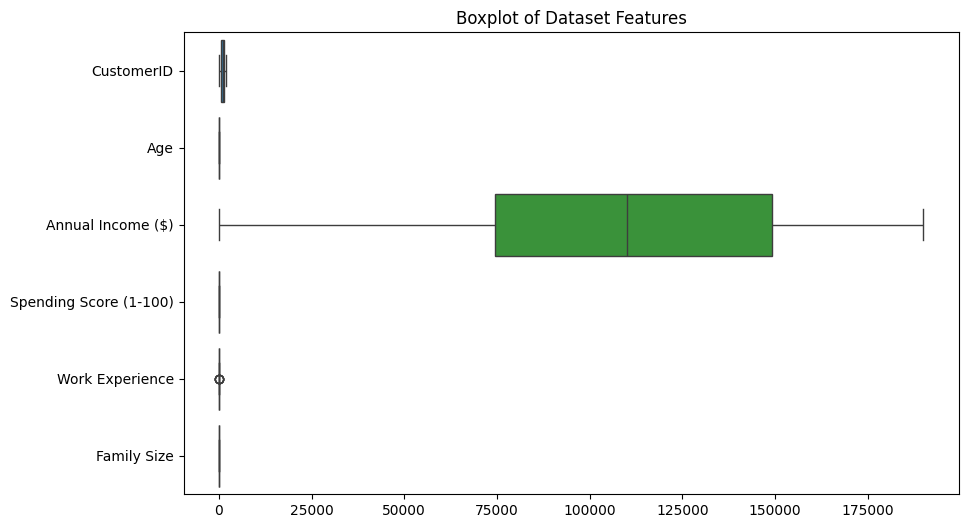

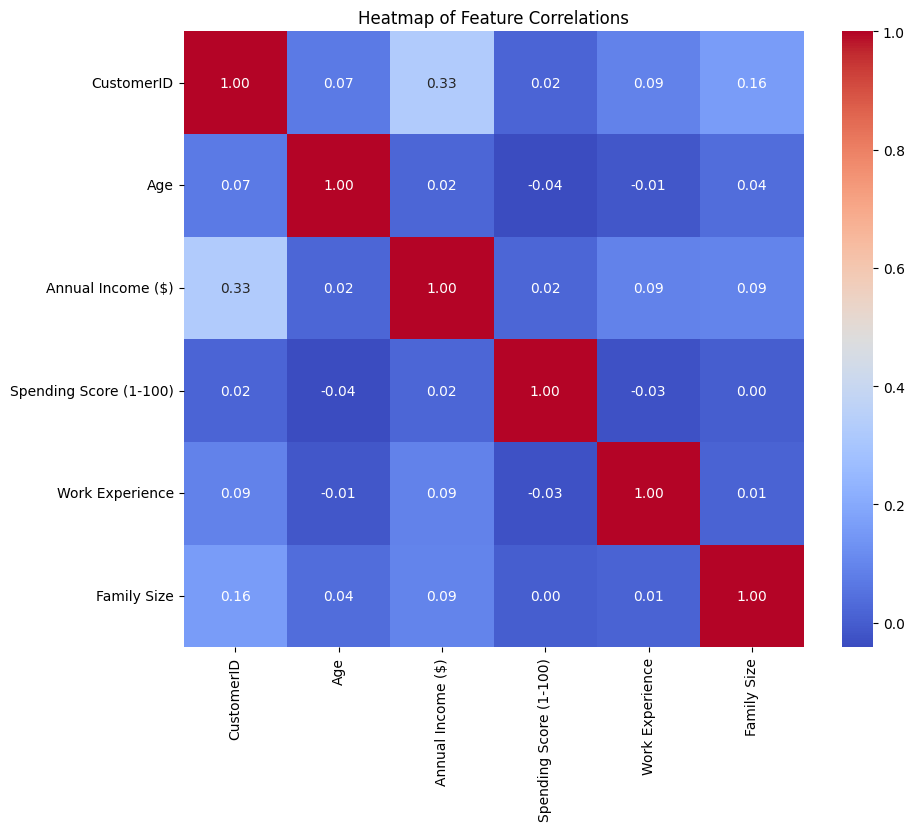

Categorical columns: Index(['Gender', 'Profession'], dtype='object')
   CustomerID    Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0   -1.731185  1.207064 -1.054089          -2.093501               -0.428339   
1   -1.729453  1.207064 -0.983723          -1.656133                1.075546   
2   -1.727721 -0.828457 -1.018906          -0.540845               -1.609962   
3   -1.725989 -0.828457 -0.913356          -1.131292                0.932319   
4   -1.724257 -0.828457 -0.631891          -1.590528               -0.392532   

   Profession  Work Experience  Family Size  
0    0.778356        -0.791207     0.117497  
1   -0.354347        -0.281162    -0.390051  
2   -0.354347        -0.791207    -1.405148  
3    1.533491        -1.046230    -0.897599  
4    0.023220        -0.536185     1.132594  


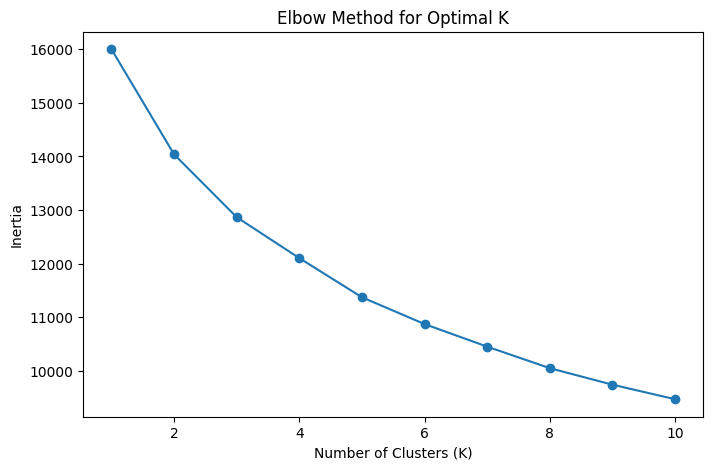

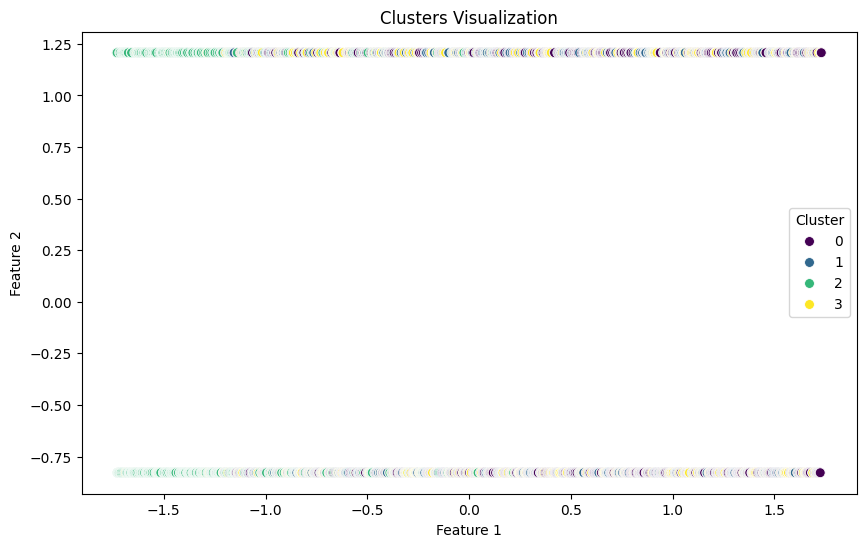

Silhouette Score for K=4: 0.11

Cluster Analysis:
          CustomerID    Gender        Age  Annual Income ($)  \
Cluster                                                        
0        1251.499142  0.375643  76.855918      122079.006861   
1        1195.835644  0.439604  21.299010      129435.661386   
2         322.815451  0.392704  43.304721       62402.049356   
3        1159.298206  0.426009  49.724215      125217.977578   

         Spending Score (1-100)  Profession  Work Experience  Family Size  
Cluster                                                                    
0                     54.325901    1.627787         3.915952     4.173242  
1                     61.023762    1.857426         4.324752     3.861386  
2                     48.881974    2.680258         3.248927     2.708155  
3                     37.347534    6.145740         4.986547     4.242152  
Clustered data saved to 'clustered_data.csv'


In [2]:
# This script performs clustering on a customer dataset using K-Means.
# It includes data loading, exploration, preprocessing, clustering, and analysis steps.
# The main libraries used are pandas for data manipulation, NumPy for numerical operations, Matplotlib and Seaborn for visualizations, and Scikit-learn for preprocessing and clustering.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Setup and Data Preparation
# Load the dataset from the specified file path or URL
data_url = "/content/Customers.csv"
data = pd.read_csv(data_url)

# Display basic information about the dataset to understand its structure
print("Dataset Overview:")
print(data.info())  # Provides data types, non-null values, and memory usage
print("\nDataset Head:")
print(data.head())  # Displays the first few rows of the dataset

# Step 2: Data Exploration
# Check for missing values in each column
print("\nMissing Values:")
print(data.isnull().sum())  # Displays the count of missing values per column

# Handle missing values for numerical columns by replacing them with the mean
numerical_columns = data.select_dtypes(include=[np.number]).columns
if numerical_columns.any():
    data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Display a statistical summary of the dataset to understand feature ranges and distributions
print("\nStatistical Summary:")
print(data.describe())

# Visualize the distribution of features using a boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h")  # Horizontal boxplot for better readability
plt.title("Boxplot of Dataset Features")
plt.show()

# Generate a heatmap to visualize correlations between numeric features
plt.figure(figsize=(10, 8))
data_numeric = data.select_dtypes(include=[float, int])
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# Step 3: Data Preprocessing
# Identify categorical columns for encoding
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Replace categorical values with numeric encoding
    label_encoders[col] = le

# Select features for clustering, excluding the target column if present
features = data.drop(columns=['TargetColumn'], errors='ignore')  # Replace 'TargetColumn' with the actual name if applicable
numeric_features = features.select_dtypes(include=['float64', 'int64'])

# Standardize numeric features to ensure equal weighting during clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Convert scaled features back to a DataFrame for easy inspection
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
print(scaled_features_df.head())  # Display the first few rows of standardized data

# Step 4: Determine Optimal K Using Elbow Method
# Calculate inertia for K values from 1 to 10
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Step 5: Perform K-Means Clustering
# Choose the optimal K based on the elbow plot
optimal_k = 4  # Update based on the elbow method visualization
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
kmeans.fit(scaled_features)  # Fit the K-Means model to the scaled data

# Add cluster labels to the original dataset
data["Cluster"] = kmeans.labels_

# Step 6: Result Analysis
# Visualize the clusters using the first two standardized features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=kmeans.labels_,
    palette="viridis",
    s=50
)
plt.title("Clusters Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Evaluate the clustering quality using the silhouette score
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

# Analyze cluster characteristics by computing the mean of each feature per cluster
print("\nCluster Analysis:")
print(data.groupby("Cluster").mean())

# Step 7: Save the results
# Save the dataset with cluster labels to a CSV file
data.to_csv("clustered_data.csv", index=False)
print("Clustered data saved to 'clustered_data.csv'")
